In [1]:
import os
import pandas as pd

df1 = pd.read_csv('./news_page2.csv', sep=',',index_col=0)
df2= pd.read_csv('./20200804_전하림.csv', sep=',',index_col=0)
#csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
#df.head()
df2.head()
df = pd.concat([df1,df2])

In [2]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#df['news'][0]

In [3]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [4]:
len(df)

1146

In [5]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  953


    code  count
0  IT/과학    264
1     경제    191
2     사회    244
3  생활/문화    254


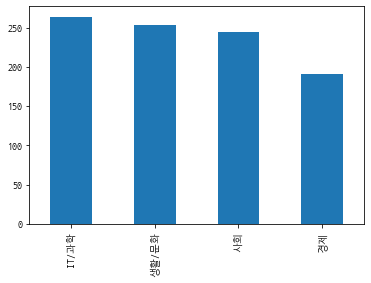

In [6]:
import matplotlib as plt
plt.rcParams["font.family"] = 'NanumGothicCoding'
df['code'].value_counts().plot(kind = 'bar')
print(df.groupby('code').size().reset_index(name = 'count'))

In [122]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문',
             '할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들',
             '파이낸셜','저작','등','뉴스','배포','데일리','김','기자','섹션','뉴', '시스','출처' ,'연합']

In [120]:
len(stopwords)

40

In [152]:
from konlpy.tag import Mecab
tokenizer = Mecab()

# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
    text_data = []
    for sentence in data:
        #- 토큰화
        text_word_pos = tokenizer.pos(sentence) 
        using_pos = ['NNG','NNP','VV']
        #- 불용어 제거
        text_word_noun_verb = [word for word,pos in text_word_pos if pos in using_pos if word not in stopwords if len(word)>1]
        text_data.append(temp_data)

    text_data = list(map(''.join, text_data))

    return text_data

In [162]:
data = []
for news in text_data:
    temp_text = []
    for word in news.split():
        if len(word)>1:
            temp_text.append(word)
    temp_text = list(map(' '.join, temp_text))
    data.append(temp_text)
data[0]    

['중 국',
 '삼 성 전 자',
 '매 장',
 '자 료',
 '사 진',
 '중 국',
 '삼 성 전 자',
 '매 장',
 '자 료',
 '사 진',
 '서 울',
 '삼 성 전 자',
 '중 국',
 '마 지 막',
 '공 장',
 '쑤 저 우',
 '공 장',
 '생 산',
 '중 단',
 '로 터',
 '통 신',
 '따 르',
 '삼 성 전 자',
 '성 명',
 '중 국',
 '삼 성',
 '중 요',
 '시 장',
 '중 국',
 '소 비 자',
 '제 품',
 '서 비 스',
 '계 속',
 '제 공',
 '밝 히',
 '로 터',
 '중 국',
 '인 건 비',
 '상 승',
 '무 역',
 '전 쟁',
 '신 종',
 '코 로 나',
 '감 염 증',
 '코 로 나',
 '대 유 행',
 '여 파',
 '글 로 벌',
 '기 업',
 '생 산',
 '공 급',
 '배 치',
 '재 고',
 '전 날',
 '사 우 스',
 '차 나',
 '모 닝',
 '포 스 트',
 '삼 성 전 자',
 '쑤 저 우',
 '공 장',
 '직 원',
 '공 문',
 '시 장',
 '경 쟁',
 '치 열',
 '글 로 벌',
 '생 산',
 '기 지',
 '전 반',
 '걸 치',
 '효 율 성',
 '제 고',
 '공 장',
 '조 립',
 '제 조 공 정',
 '중 단',
 '결 정',
 '전 달',
 '보 도',
 '따 르',
 '연 구',
 '개 발',
 '부 문',
 '직 원',
 '제 외',
 '생 산',
 '부 문',
 '직 원',
 '대 상',
 '대 규 모',
 '구 조',
 '조 정',
 '따 르',
 '기 준',
 '쑤 저 우',
 '공 장',
 '직 원',
 '알 리',
 '쑤 저 우',
 '공 단',
 '대 변 인',
 '삼 성 전 자',
 '결 정',
 '지 지',
 '현 지',
 '지 방',
 '정 부',
 '해 고',
 '직 원',
 '자 리',
 '밝 히',
 '삼 성 전 자',
 '쑤 저 우',
 '공 장',
 '설 립',


1    기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 따르 언론사 개별 기사 개 ...
1    우 코로나 바이러스 감염증 코 나이 뮤지컬 업계 타격 입히 인기 뮤지컬 오페라 유령...
1    구리시 코로나 상황 보고회 사진 제공 구리시 구리시 코로나 상황 보고회 사진 제공 ...
1    일 오후 강원 고성군 토성면 주택 화재 인근 야산 번지 산불 발생 강원도 산림 소방...
1    뮤지컬 컴퍼니 제공 뮤지컬 컴퍼니 제공 뮤지컬 컴퍼니 제공 뮤지컬 컴퍼니 제공 뮤지...
1    게임 코리아 대표 박 성철 늘 암 시 디 센트 크래시 랜드 금주 무료 게임 제공 일...
1    유 은혜 왼쪽 부총리 교육부 장관 기영 과기 부 장관 일 정부 서울 청사 원격 교육...
1    과천시 페이스 북 과천시 페이스 북 천 지역 코로나 진자 동선 관련 정보 과천시 천...
1    동영상 앵커 인터넷 해외 직구 살 저가 어린이 휴대용 카시트 안전 소비 자원 조사 ...
1    한국 가스 안전 공사 전경 사진 제공 국 가스 안전 공사 한국 가스 안전 공사 전경...
1    안양 뉴 시스 박석 지나 일 발생 경기 안양 코로나 진자 여성 비산동 지나 일 병원...
1    희원 헬스 케어 전문 기업 다이어트 고객 건강 체중 관리 위하 철저 방역 나서 전국...
1    서울 뉴 시스 박 주연 포 코리아 신종 코로나 바 감염증 인하 국가적 재난 상황 극...
1    윤 열 검찰 총장 자료 사진 데일리 안 류 영주 윤 열 검찰 총장 자료 사진 데일리...
1    동영상 오늘 낮 동안 구름 사이 봄볕 내리쬐 기온 올르 서울 낮 기온 도 오르 예년...
1    일본 신형 인플루엔자 치료제 아비 일본 신형 인플루엔자 치료제 아비 서울 뉴 시스 ...
1    바이오니아 인도네시아 코로나 검사 필요 장비 진단 키트 공급 바이오니아 인도네시아 ...
1    국회 일 본회의 열고 인권 침해 진상 규명 위하 진실 화해 위하 과거사 정리 기본법...
1    헤럴드 경

In [147]:
text_data = preprocessing(df['news'])
print(text_data[3])

중국 삼성전자 매장 자료 사진 중국 삼성전자 매장 자료 사진 서울 박 연 삼성전자 중국 마지막 공장 쑤저우 공장 생산 중단 일 로터 통신 따르 삼성전자 성명 통 중국 삼성 중요 시장 남 중국 소비자 우 제품 서비스 계속 제공 밝히 로터 중국 인건비 상승 미 무역 전쟁 신종 코로나 바 감염증 코로나 대유행 여파 인 글로벌 기업 생산 공급 망 배치 재고 전 전날 사우스 차나 모닝 포스트 삼성전자 쑤저우 공장 직원 공문 통 시장 경쟁 치열 글로벌 생산 기지 전반 걸치 효율성 제고 위 공장 내 조립 제조공정 중단 결정 전달 보도 따르 연구 개발 부문 직원 제외 생산 부문 직원 대상 대규모 구조 조정 따르 녀 말 기준 쑤저우 공장 달 직원 일 알리 쑤저우 공단 대변인 삼성전자 결정 해 지지 현지 지방 정부 해고 직원 일 자리 찾 돕 밝히 삼성전자 쑤저우 공장 설립 녀 해외 출 규모 달러 르 후 출 감소 녀 출 규모 달러 기록 삼성전자 지난해 중국 내 휴대 전화 생산 공장 철 대신 베트남 전 삼성전자 중국 생산 중단 결정 중국 제조업 점 잃 점 단적 보여주 전 미 갈 격화 중국산 전자 제품 주요 출 시장 불 익 얻 위험 지적 코리아


In [131]:
text_data = []
for news in df['kkma']:
    temp_data = [word for word in news if word not in stopwords]
    #temp_data = [word for word in temp_data if len(word)>1]
    text_data.append(temp_data)

text_data = list(map(''.join, text_data))

In [144]:
text_data = list(map(''.join, text_data))

In [145]:
text_data[0]

'중 국   삼 성 전 자   매 장   자 료   사 진   중 국   삼 성 전 자   매 장   자 료   사 진   서 울   박   연   삼 성 전 자   중 국   마 지 막   공 장   쑤 저 우   공 장   생 산   중 단   일   로 터   통 신   따 르   삼 성 전 자   성 명   통   중 국   삼 성   중 요   시 장   남   중 국   소 비 자   우   제 품   서 비 스   계 속   제 공   밝 히   로 터   중 국   인 건 비   상 승   미   무 역   전 쟁   신 종   코 로 나   바   감 염 증   코 로 나   대 유 행   여 파   인   글 로 벌   기 업   생 산   공 급   망   배 치   재 고   전   전 날   사 우 스   차 나   모 닝   포 스 트   삼 성 전 자   쑤 저 우   공 장   직 원   공 문   통   시 장   경 쟁   치 열   글 로 벌   생 산   기 지   전 반   걸 치   효 율 성   제 고   위   공 장   내   조 립   제 조 공 정   중 단   결 정   전 달   보 도   따 르   연 구   개 발   부 문   직 원   제 외   생 산   부 문   직 원   대 상   대 규 모   구 조   조 정   따 르   녀   말   기 준   쑤 저 우   공 장   달   직 원   일   알 리   쑤 저 우   공 단   대 변 인   삼 성 전 자   결 정   해   지 지   현 지   지 방   정 부   해 고   직 원   일   자 리   찾   돕   밝 히   삼 성 전 자   쑤 저 우   공 장   설 립   녀   해 외   출   규 모   달 러   르   후   출   감 소   녀   출   규 모   달 러   기 록   삼 성 전 자   지 난 해   중 국   내   휴 대   전 화   생 산   공 장   철   대 신   베 트 남   전  

In [89]:
df['kkma'] = text_data

In [90]:
df.to_csv('./after_kkma.csv')

In [91]:
df = pd.read_csv('./after_kkma.csv',index_col=0)
text_data = df['kkma']

In [92]:
df[df['code'] =='사회'].head()

,news,code,kkma
0,일 오후 강원 고성군 도원리의 주택 화재가 산불로 번져 도학초교 야산에서 연기와 불...,사회,일 오후 강원 고성군 도원 주택 화재 산불 번지 도학 초교 야산 연기 불길 치솟 현...
1,기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...,사회,기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 따르 언론사 개별 기사 개 ...
5,동영상 뉴스 진행 최영주 앵커 전화연결 제진주 서울시립대 소방방재학과 교수 아...,사회,동영상 진행 최영주 앵커 전화 연결 진주 서울 시립 대 소방 방재 학 교 아래 텍스...
6,안양시의회 제회 추경예산안 의결 사진제공안양시의회 안양시의회 제회 추경예산안 의결 ...,사회,안양 시회 제회 추경 예산안 결 사진 제공 안양 시회 안양 시회 제회 추경 예산안 ...
7,대형 산불 발생 주년을 맞은 강원 고성군 토성면의 민둥산에서 조림사업이 진행중이다 ...,사회,대형 산불 발생 맞 강원 고성군 토성면 민둥산 조림 사업 진행 사진 찬 우 대형 산...


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(data, df['code'], random_state = 0)

In [158]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 714
테스트용 뉴스 기사의 개수 :  239
훈련용 레이블의 개수 :  714
테스트용 레이블의 개수 :  239


In [161]:
X_train[0]

['중국',
 '삼성전자',
 '매장',
 '자료',
 '사진',
 '중국',
 '삼성전자',
 '매장',
 '자료',
 '사진',
 '서울',
 '삼성전자',
 '중국',
 '마지막',
 '공장',
 '쑤저우',
 '공장',
 '생산',
 '중단',
 '로터',
 '통신',
 '따르',
 '삼성전자',
 '성명',
 '중국',
 '삼성',
 '중요',
 '시장',
 '중국',
 '소비자',
 '제품',
 '서비스',
 '계속',
 '제공',
 '밝히',
 '로터',
 '중국',
 '인건비',
 '상승',
 '무역',
 '전쟁',
 '신종',
 '코로나',
 '감염증',
 '코로나',
 '대유행',
 '여파',
 '글로벌',
 '기업',
 '생산',
 '공급',
 '배치',
 '재고',
 '전날',
 '사우스',
 '차나',
 '모닝',
 '포스트',
 '삼성전자',
 '쑤저우',
 '공장',
 '직원',
 '공문',
 '시장',
 '경쟁',
 '치열',
 '글로벌',
 '생산',
 '기지',
 '전반',
 '걸치',
 '효율성',
 '제고',
 '공장',
 '조립',
 '제조공정',
 '중단',
 '결정',
 '전달',
 '보도',
 '따르',
 '연구',
 '개발',
 '부문',
 '직원',
 '제외',
 '생산',
 '부문',
 '직원',
 '대상',
 '대규모',
 '구조',
 '조정',
 '따르',
 '기준',
 '쑤저우',
 '공장',
 '직원',
 '알리',
 '쑤저우',
 '공단',
 '대변인',
 '삼성전자',
 '결정',
 '지지',
 '현지',
 '지방',
 '정부',
 '해고',
 '직원',
 '자리',
 '밝히',
 '삼성전자',
 '쑤저우',
 '공장',
 '설립',
 '해외',
 '규모',
 '달러',
 '감소',
 '규모',
 '달러',
 '기록',
 '삼성전자',
 '지난해',
 '중국',
 '휴대',
 '전화',
 '생산',
 '공장',
 '대신',
 '베트남',
 '삼성전자',
 '중국',
 '생산',
 '중단',
 '결정',

In [160]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

AttributeError: 'list' object has no attribute 'lower'

In [106]:
X_train_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [107]:
X_train_counts

<714x11332 sparse matrix of type '<class 'numpy.int64'>'
	with 66537 stored elements in Compressed Sparse Row format>

In [108]:
vocab = count_vect.get_feature_names()
print(vocab[:10])

# 벡터화된 피처를 확인해 봄
import numpy as np
dist = np.sum(X_train_counts, axis=0)

#for tag, count in zip(vocab, dist):
#    print(count, tag)

pd.DataFrame(dist, columns=vocab)

['각각', '각계', '각광', '각국', '각급', '각도', '각료', '각별', '각본', '각사']


,각각,각계,각광,각국,각급,각도,각료,각별,각본,각사,...,히트,히트곡,힌트,힐난,힐링,힘내,힘쓰,힘입,힘주,힘줄
0,17,8,3,17,2,5,1,4,1,1,...,15,2,1,2,3,3,9,5,1,1


In [109]:
pd.DataFrame(X_train_counts.toarray(), columns=vocab).head()

,각각,각계,각광,각국,각급,각도,각료,각별,각본,각사,...,히트,히트곡,힌트,힐난,힐링,힘내,힘쓰,힘입,힘주,힘줄
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [103]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [104]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.71      0.68      0.69        88
          경제       0.59      0.42      0.49        52
          사회       0.53      0.63      0.58        51
       생활/문화       0.47      0.56      0.51        48

    accuracy                           0.59       239
   macro avg       0.58      0.57      0.57       239
weighted avg       0.60      0.59      0.59       239



In [56]:
new_sent = preprocessing(["영화가 좋아"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [76]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
    news = requests.get(url)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [78]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  return df

In [80]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [88]:
code_list = [102, 103, 105]
date = [20200501,20200401,20200301]
def make_total_data(page_num, code_list, date):
    df = None
    for code in code_list:
        for day in date:
            url_list = make_urllist(page_num, code, day)
            df_temp = make_data(url_list, code)
            print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

            if df is not None:
                df = pd.concat([df, df_temp])
            else:
                df = df_temp

    return df

df = make_total_data(2, code_list, date)

102번 코드에 대한 데이터를 만들었습니다.
102번 코드에 대한 데이터를 만들었습니다.
102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [90]:
df.to_csv('./news_page2.csv')

In [89]:
len(df)

360

In [82]:
len(df)

0